In [155]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [156]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [157]:
# define paths for the datasets to be used
path_rental = "Average Rents_Concat.csv"
path_units = "Number_of_Units_Concat.csv"
path_vacancy = "Vacancy Rate Concat.csv"

In [158]:
#read into files to see the column names to create a function
rental_df = pd.read_csv(path_rental)
rental_df.columns


Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [159]:
# units_df = units_df.loc[(units_df["Year"] == 2022 )& (units_df["Province"] == "Que")]
# units_df["Total "].sum()

In [160]:
#identify how provinces are named in the dataset
print(rental_df["Province"].unique())


['Nfld.Lab.' 'N.S.' 'N.B.' 'Que' 'Ont.' 'Man.' 'Sask.' 'Alta' 'B.C.']


In [161]:
#Create a funtion to extract based on the province and year 
def data_set(filepath,Province,Year,column):
    get_df = pd.read_csv(filepath)
    df = get_df.loc[(rental_df["Year"] == Year )& (get_df["Province"] == Province)]
    df_Province = df[(df[column]!=0)]
    return df_Province
    

In [162]:
#Check if the function works fine and get the provinces
Year = 2022
column = "2 Bedroom"
df_Ontario = data_set(path_rental, "Ont.",Year,column)
df_Quebec = data_set(path_rental,"Que",Year,column)
df_BC = data_set(path_rental, "B.C.",Year,column)
df_Alberta = data_set(path_rental, "Alta",Year,column)
df_sask = data_set(path_rental,"Sask.",Year,column)
df_NovaScotia = data_set(path_rental,"N.S.",Year,column)

In [163]:
#define Provinces name in the list
Province = ['Ont.', "Que" ,"Alta",'B.C.', "Sask.","N.S."]


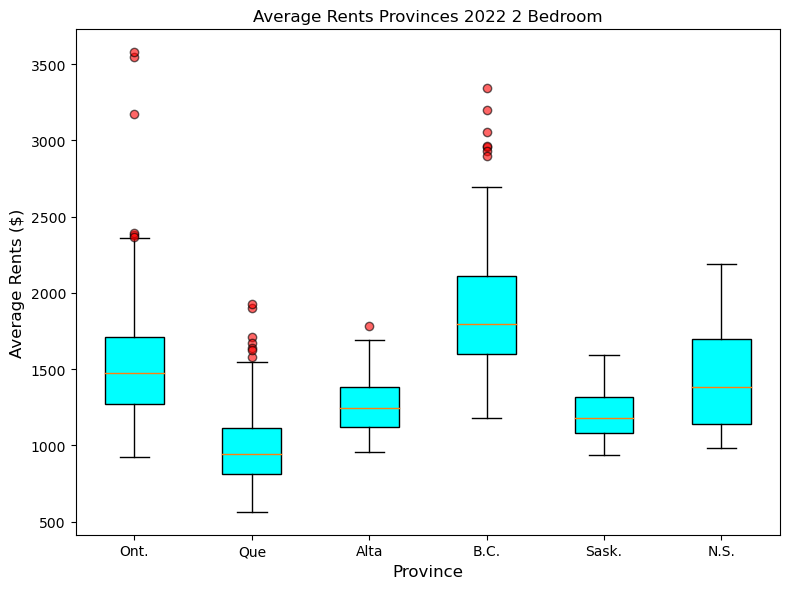

In [164]:
# create plots using the column for we want to focus on
x_data = [df_Ontario[column],df_Quebec[column],df_Alberta[column],df_BC[column],df_sask[column],df_NovaScotia[column]]
out_patch = dict(markerfacecolor = "red", marker = "o",alpha = 0.6)
box_plot = plt.boxplot(x = x_data,labels = Province, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*9
plt.xlabel("Province",fontsize = 12)
plt.ylabel(f"Average Rents ($)",fontsize = 12)
plt.title(f"Average Rents Provinces {Year} {column}",fontsize = 12)

for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Provinces {Year} {column}.png")          
plt.show()

In [165]:
#get columns for Ontario
df_Ontario.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [166]:
#get unique names to make a list for further analysis
df_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [167]:
# make a list to plot and use in the box plot x axis label
Centre_of_interest = ['Barrie', "Hamilton",
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Toronto',
       'Windsor']

In [168]:
#get the data for the column  and the y axis 
Centre_data = []
for each in Centre_of_interest:
    df = df_Ontario[(df_Ontario["Centre"])==each]
    Centre_data.append(df[column])
    

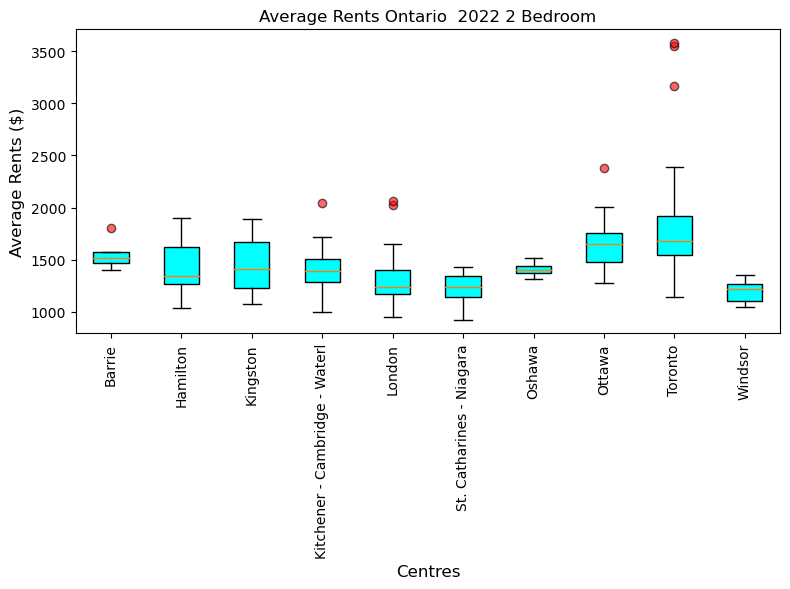

In [169]:
# plot the data for the province based on the zones
x_data = Centre_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Centre_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Centre_of_interest)
plt.xlabel("Centres",fontsize = 12)
plt.ylabel(f"Average Rents ($)",fontsize = 12,)
plt.title(f"Average Rents Ontario  {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Ontario {Year} {column}.png") 
plt.tight_layout
plt.show()

In [170]:
# extract data for Toronto
df_Toronto = df_Ontario[(df_Ontario["Centre"]=="Toronto")]

In [171]:
df_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
8065,Ont.,Toronto,Toronto (Central),Waterfront Communities -The Island,Apt & Other,0.0,1986.0,2321.0,0.0,2103.0,2022
8067,Ont.,Toronto,Toronto (Central),Moss Park/Regent Park,Apt & Other,1274.0,1824.0,2340.0,3237.0,1930.0,2022
8069,Ont.,Toronto,Toronto (Central),Cabbagetown-S. St. James Town,Apt & Other,1374.0,1593.0,2126.0,0.0,1654.0,2022
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022
...,...,...,...,...,...,...,...,...,...,...,...
8323,Ont.,Toronto,Pickering/Ajax/Uxbridge,Ajax/Pickering,Apt & Other,0.0,1193.0,1533.0,1608.0,1556.0,2022
8325,Ont.,Toronto,Pickering/Ajax/Uxbridge,Uxbridge,Apt & Other,0.0,1389.0,1575.0,0.0,1455.0,2022
8327,Ont.,Toronto,Milton/Halton Hills,Milton/Halton Hills,Apt & Other,911.0,1309.0,1523.0,1791.0,1444.0,2022
8329,Ont.,Toronto,Orangeville/Mono,Orangeville/Mono,Apt & Other,0.0,1269.0,1455.0,1588.0,1372.0,2022


In [172]:
# get unique zones
df_Toronto["Zone"].unique()

array(['Toronto (Central)', 'Toronto (East)', 'Toronto (North)',
       'Toronto (West)', 'Etobicoke (South)', 'Etobicoke (Central)',
       'Etobicoke (North)', 'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Brampton (East)', 'Oakville',
       'Richmond Hill/Vaughan/King', 'Aurora, Newmkt, Whit-St.',
       'Markham', 'Pickering/Ajax/Uxbridge', 'Milton/Halton Hills',
       'Orangeville/Mono', 'Bradford/West Gwillimbury/New Tecumseth'],
      dtype=object)

In [173]:
Zones_of_interest = ['Toronto (Central)', 'Toronto (North)', 'Toronto (West)',
       'Etobicoke (South)', 'Etobicoke (Central)', 'Etobicoke (North)',
       'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Oakville']

In [174]:
Zonal_data = []
for each in Zones_of_interest:
    df = df_Toronto[(df_Toronto["Zone"])==each]
    Zonal_data.append(df[column])
    
    

In [175]:
Zonal_data

[8065    2321.0
 8067    2340.0
 8069    2126.0
 8071    2003.0
 8073    2201.0
 8075    3548.0
 8079    2391.0
 Name: 2 Bedroom, dtype: float64,
 8093    2360.0
 8095    2234.0
 8097    2335.0
 8099    2204.0
 8101    1920.0
 8103    2193.0
 8105    2016.0
 8107    2290.0
 8109    2010.0
 8111    1915.0
 Name: 2 Bedroom, dtype: float64,
 8113    1651.0
 8117    2365.0
 8119    1812.0
 8123    2020.0
 8125    1781.0
 Name: 2 Bedroom, dtype: float64,
 8129    1443.0
 8131    1476.0
 8133    1404.0
 8137    1675.0
 8139    1657.0
 Name: 2 Bedroom, dtype: float64,
 8141    3578.0
 8143    1736.0
 8145    1866.0
 8147    1641.0
 8149    2325.0
 8151    2071.0
 8153    1774.0
 8155    2032.0
 8156    1620.0
 8157    1686.0
 Name: 2 Bedroom, dtype: float64,
 8161    1410.0
 8163    1421.0
 8165    1702.0
 Name: 2 Bedroom, dtype: float64,
 8167    2245.0
 8169    1740.0
 8171    1420.0
 8177    1557.0
 8179    1385.0
 8181    1520.0
 8185    1761.0
 Name: 2 Bedroom, dtype: float64,
 8187    1

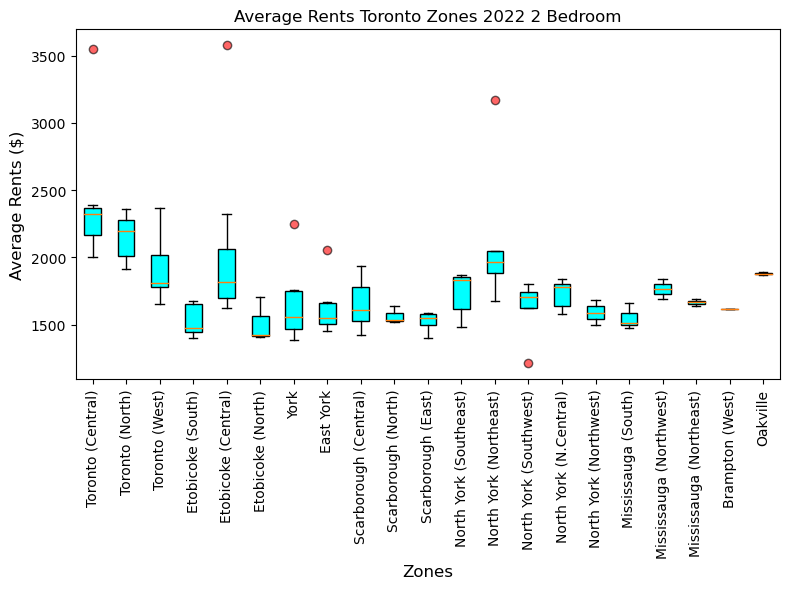

In [176]:
#plot the data
x_data = Zonal_data
plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True
box_plot = plt.boxplot(x = x_data,labels = Zones_of_interest, flierprops = out_patch,patch_artist = True)
color = ["Cyan"]
colors = color*len(Zones_of_interest)
plt.xlabel("Zones",fontsize = 12)
plt.ylabel(f"Average Rents ($)",fontsize = 12,)
plt.title(f"Average Rents Toronto Zones {Year} {column}",fontsize = 12)
plt.xticks(rotation = 90)
for patch,color in zip(box_plot["boxes"],colors):
    patch.set_facecolor(color)
plt.savefig(f"Average Rents Toronto {Year} {column}.png") 
plt.tight_layout
plt.show()